In [3]:
from sklearn import datasets
iris = datasets.load_iris()

samples = iris.data
print(samples.shape)

(150, 4)


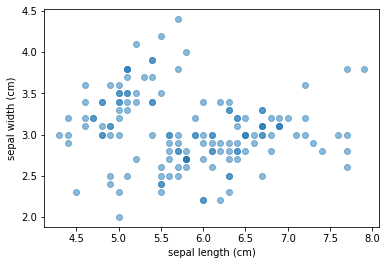

In [4]:
# 첫번째와 두번째 피쳐만 활용.

import matplotlib.pyplot as plt
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x,y,alpha=0.5)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

centorids_x :  [7.30214562 5.15095903 4.97759855]
centorids_y :  [2.7914909  3.44676167 4.34737063]
centorids :  [(7.302145624392642, 2.7914909028552946), (5.150959025965184, 3.446761667139683), (4.977598552795405, 4.3473706297264405)]


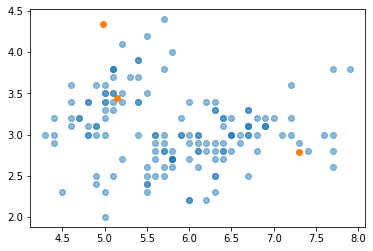

In [5]:
# 3개의 중심축을 랜덤으로 나타내는 값 생성

import numpy as np

k = 3

centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))
print("centorids_x : ", centroids_x)
print("centorids_y : ", centroids_y)
print("centorids : ", centroids)
plt.scatter(x,y,alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.show()

In [6]:
# 유클리드 공간에서, 두 벡터사이의 거리를 구하는 함수
def distance(a,b):
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a,b))]) ** 0.5

In [7]:
# 레이블에 대해서, 중심축 3개와의 거리 중에서 가장 가까운 인덱스를 labels 리스트에 저장한다.
labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x,y))) # 2개의 피쳐에 대해서 유클리드 공간의 좌표로 만든다.
for i in range(len(samples)):
    distances = np.zeros(k)    
    for j in range(k):
        distances[j] = distance(sepal_length_width[i], centroids[j]) 
    labels[i] = np.argmin(distances) # 가장 작은 값의 인덱스를 반환
print(labels.shape)
print(labels)

(150,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1.]


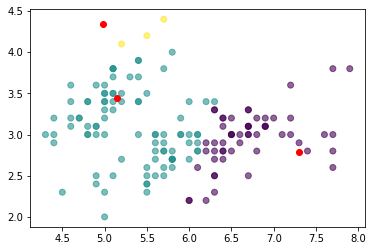

In [8]:
# 3개로 분류된 labels리스트를 pyplot scatter의 컬러 속성에 넣으면, 시각화해줌.

plt.scatter(x, y, c=labels, alpha=0.6)
plt.scatter(centroids_x, centroids_y, c="r")
plt.show()

In [9]:
# Repeat step

from copy import deepcopy
centroids_old = np.zeros(np.array(centroids).shape)
print("centorids_old.shape : ", centroids_old.shape)
labels = np.zeros(len(samples))
error = np.zeros(k)

for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])
while (error.all() != 0):
    for i in range(len(samples)):
        distances = np.zeros(k)
        for j in range(k):
            distances[j] = distance(sepal_length_width[i], centroids[j])
        labels[i] = np.argmin(distances)
    centroids_old = deepcopy(centroids)
    # 해당 centroids 군집에 속하는 레이블에 대한 거리의 평균을 구해서, centroids에 다시 갱신한다. 
    for i in range(k):
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
    for i in range(k): # 갱신된 centroids와 바로 직전의 거리의 차이를 구한다.
        error[i] = distance(centroids_old[i], centroids[i])


centorids_old.shape :  (3, 2)


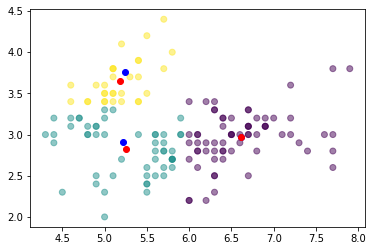

In [10]:
centroids_old = np.array(centroids_old)
centroids = np.array(centroids)
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()